# CarDekho Kaggle Dataset Analysis

### The purpose of this analysis is to predict the selling price of a car in the used car market, which is currently undergoing a lot of growth in India. 
### The prediction is based on a lot of factors in order to make it realistic and in this notebook I attempt to analyse the data set independently based on my perception and understandings.

### Importing the Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import cufflinks as cf
cf.go_offline()

sns.set_style("whitegrid")
import scipy.stats as stats

sns.set(rc={'figure.figsize':(9,5)})

### Importing the data

In [3]:
data1 = pd.read_csv("C:\\Users\\Shubham\\Documents\\Self Learning\\CarDekho Dataset\\Train Data\\CAR DETAILS FROM CAR DEKHO.csv")
data2 = pd.read_csv("C:\\Users\\Shubham\\Documents\\Self Learning\\CarDekho Dataset\\Train Data\\Car details v3.csv")

### Working with the first Data Set

In [4]:
data1.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


In [5]:
data1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
data1.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [7]:
data1.replace(to_replace ="First Owner",value = 0, inplace = True)
data1.replace(to_replace ="Second Owner",value = 1, inplace = True)
data1.replace(to_replace ="Third Owner",value = 2, inplace = True)
data1.replace(to_replace ="Fourth & Above Owner",value = 3, inplace = True)
data1.replace(to_replace ="Test Drive Car",value = 4, inplace = True)

In [8]:
data1.owner.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [9]:
data1.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0


### Working with the second data set

In [10]:
data2.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


#### We can see that there is discrepancies in the names of the columns of the Data Sets. So we need to bring homogeniety in the names of the columns.

In [11]:
data2.drop(['mileage', 'engine', 'max_power', 'torque', 'seats'], axis = 1, inplace = True)

In [12]:
data2.km_driven.unique()

array([ 145500,  120000,  140000,  127000,   45000,  175000,    5000,
         90000,  169000,   68000,  100000,   80000,   40000,   70000,
         53000,   50000,   72000,   35000,   28000,   25000,    2388,
         16200,   10000,   15000,   42000,   60000,   76000,   28900,
         86300,   23300,   32600,   10300,   77000,   99000,   27800,
         49800,  151000,   54700,   64000,   63000,  127700,   33900,
         59000,  110000,  147000,   30000,  135000,    9850,   78000,
        170000,   49000,   32000,   38000,   44000,   12000,   55500,
         61500,  150000,   37800,  114000,   48000,   69000,   13000,
         76139,   65000,    1303,   31800,   20000,   17000,   21000,
         37000,   29500,   27000,    7500,   19000,   41000,   39000,
         22000,   47000,   72200,   49900,    9000,   11000,   95000,
         18000,   46100,   16000,    9654,   24300,   42163,    8000,
         71000,    9500,   36600,   14000,  120600,   86000,    7800,
         31377,   75

In [13]:
data2.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [14]:
data2.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [15]:
data2.replace(to_replace ="First Owner",value = 0, inplace = True)
data2.replace(to_replace ="Second Owner",value = 1, inplace = True)
data2.replace(to_replace ="Third Owner",value = 2, inplace = True)
data2.replace(to_replace ="Fourth & Above Owner",value = 3, inplace = True)
data2.replace(to_replace ="Test Drive Car",value = 4, inplace = True)

In [16]:
data2.owner.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [17]:
d = [data1, data2]
data = pd.concat(d)

### Checking the sanity of the data :

In [18]:
data.shape


(12468, 8)

In [19]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1


In [20]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,3
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,0


In [21]:
data.describe()

,year,selling_price,km_driven,owner
count,12468.000000,1.246800e+04,1.246800e+04,12468.000000
mean,2013.555743,5.915773e+05,6.856508e+04,0.463747
std,4.118485,7.377876e+05,5.333721e+04,0.728292
min,1983.000000,2.000000e+04,1.000000e+00,0.000000
25%,2011.000000,2.400000e+05,3.500000e+04,0.000000
50%,2014.000000,4.200000e+05,6.000000e+04,0.000000
75%,2017.000000,6.500000e+05,9.000000e+04,1.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           12468 non-null  object
 1   year           12468 non-null  int64 
 2   selling_price  12468 non-null  int64 
 3   km_driven      12468 non-null  int64 
 4   fuel           12468 non-null  object
 5   seller_type    12468 non-null  object
 6   transmission   12468 non-null  object
 7   owner          12468 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 876.7+ KB


### Exploratory Data Analysis

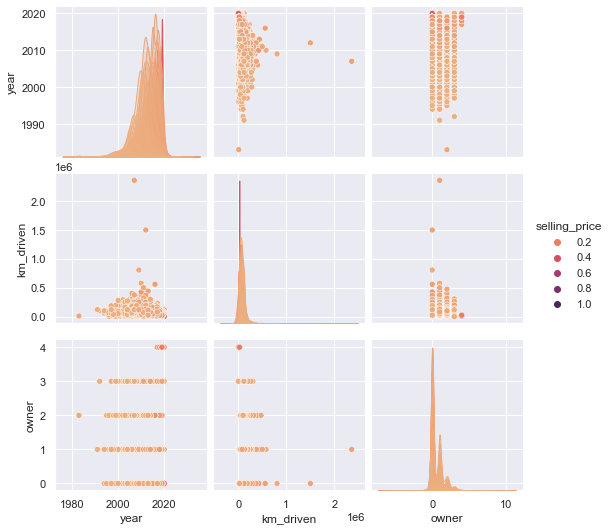

In [23]:
sns.pairplot(data, hue = 'selling_price', palette = "flare")

<AxesSubplot:>

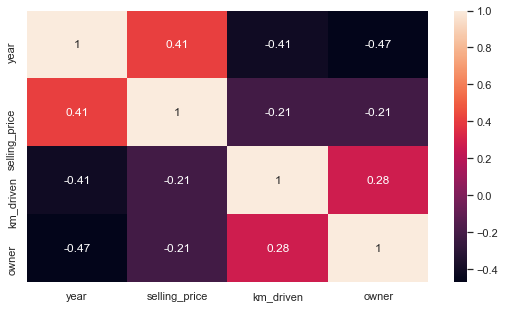

In [24]:
sns.heatmap(data.corr(),annot=True)

**We can see that there is a high correlation between :** 
* Year of purchase and Kilometers a car has been driven
* Year of purchase and Selling Price of a car
* Year of purchase and Number of Owners of a car

**Apart from this there is also a moderate amount of correlation between :**
* Kilometers a car has been driven and Selling Price
* Kilometers a car has been driven and Number of Owners

<AxesSubplot:xlabel='owner', ylabel='count'>

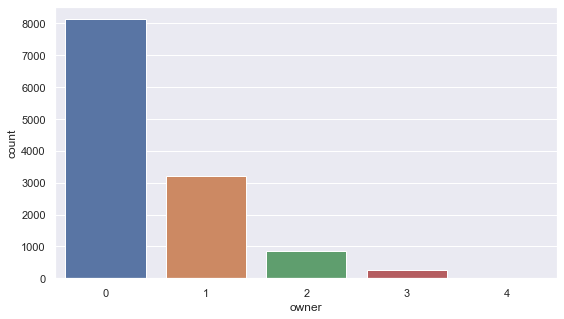

In [25]:
sns.countplot(x='owner',data=data)

####  In this case we can see that the number of cars with more than three previous owners are quite less. Apart from this the number of Test Drive Cars are also quite negligible. 

### Relation of Selling Price with Categorical Variables -

<AxesSubplot:xlabel='name', ylabel='selling_price'>

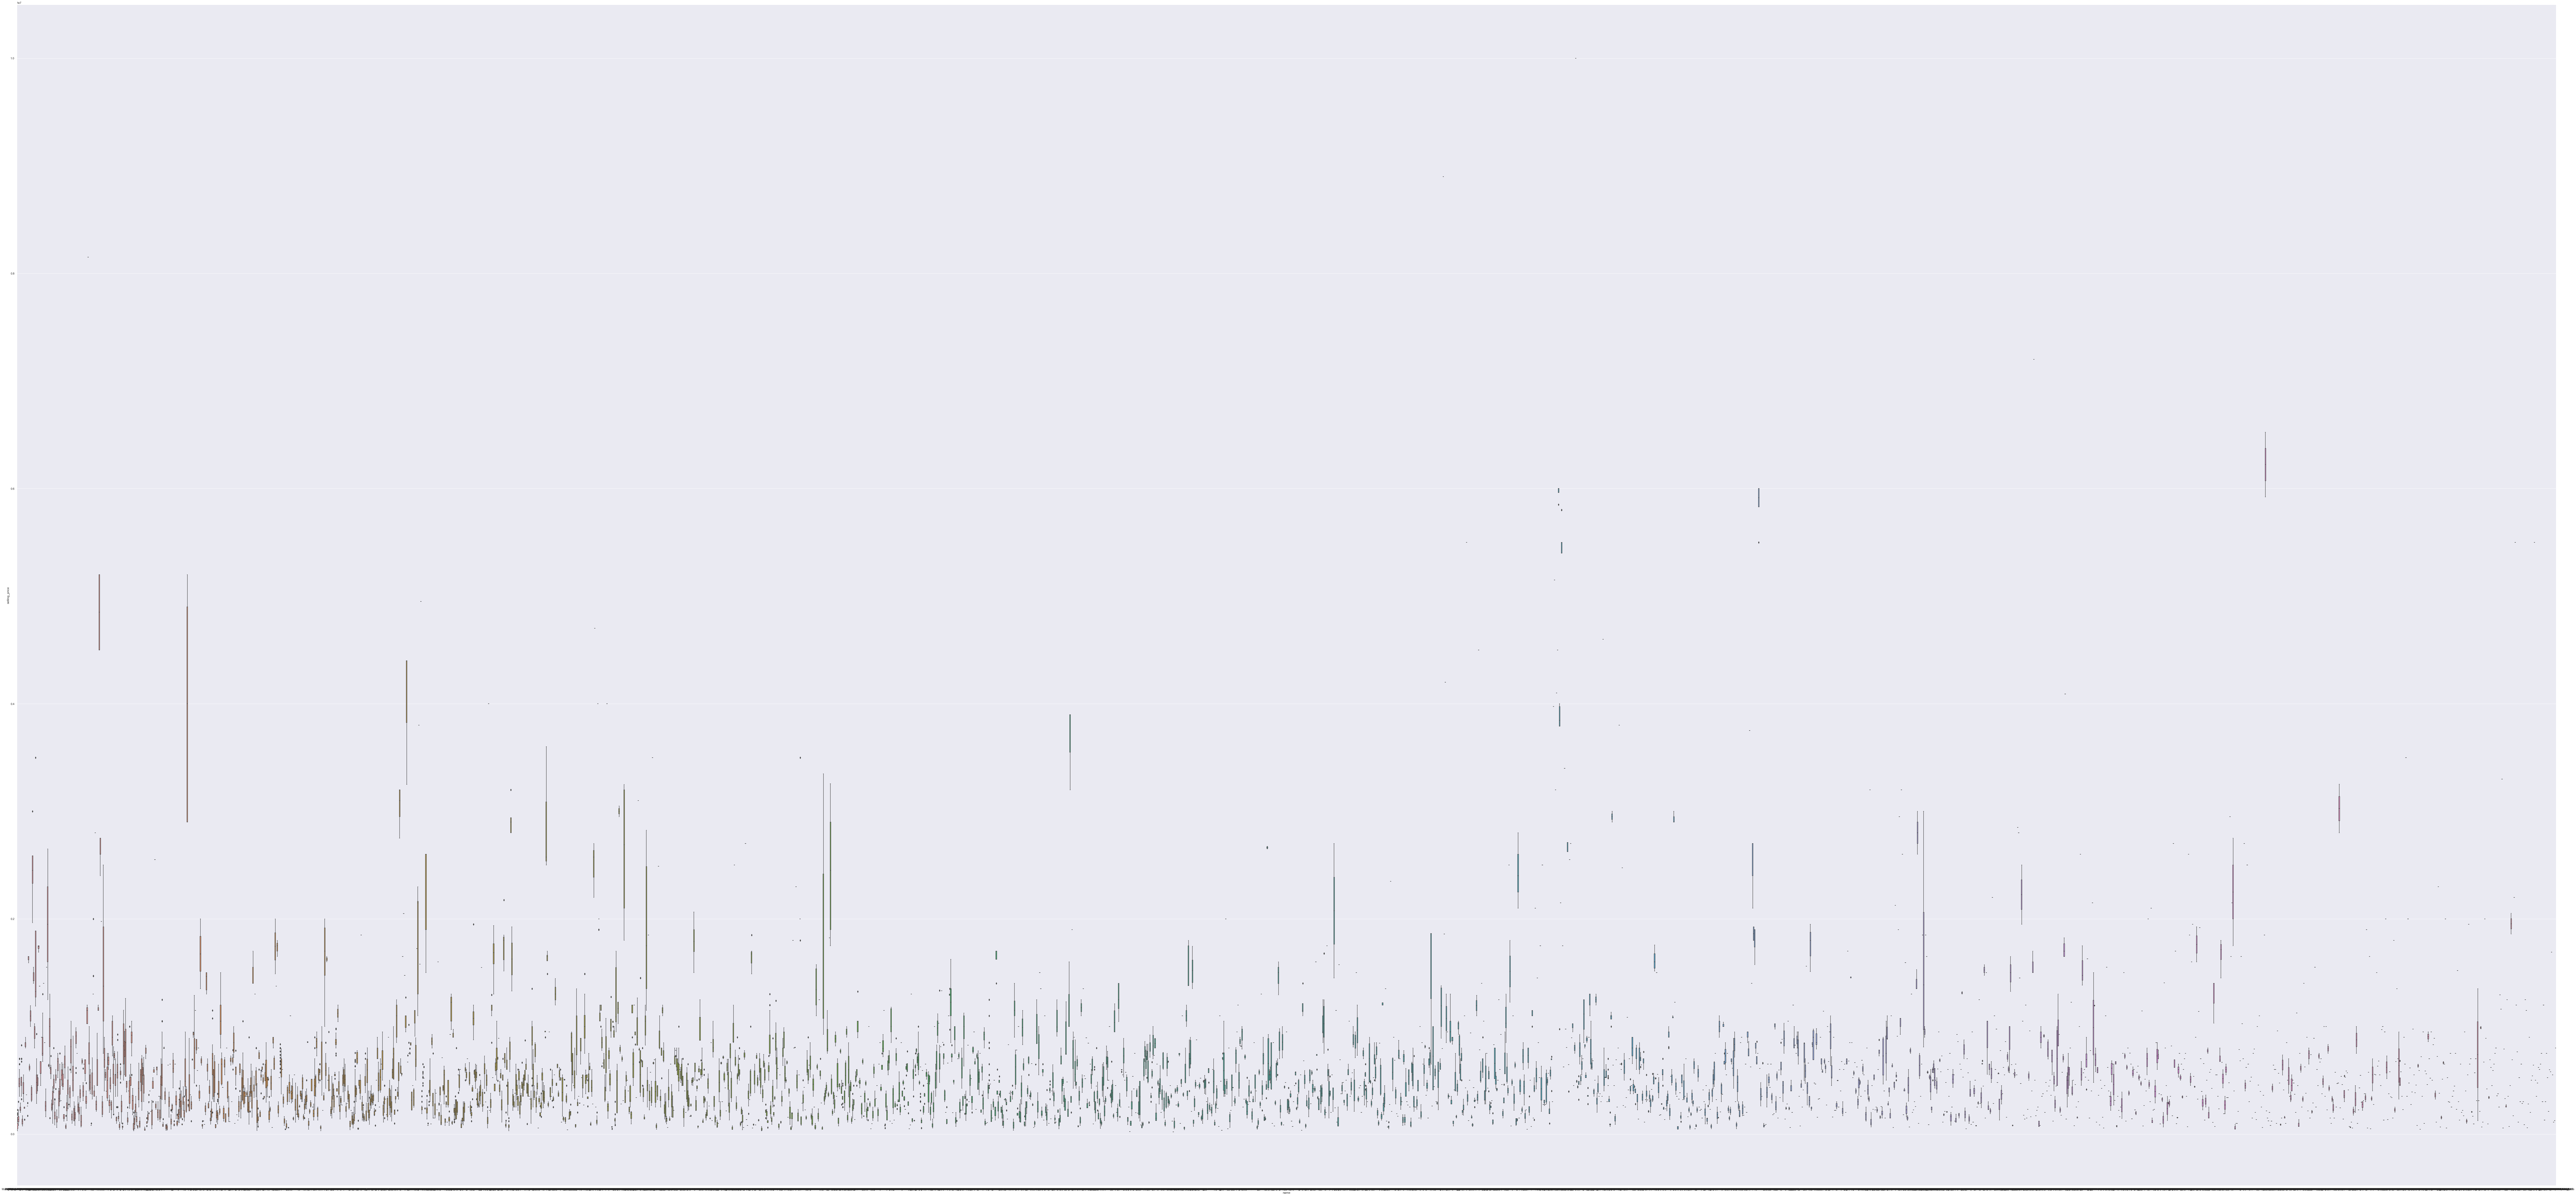

In [26]:
plt.figure(figsize=(178,85))
sns.boxplot(data = data,x='name', y = 'selling_price')

**It is difficult to get a clear picture from this, but one thing we can understand is that most of the car models fetch a similar price,but there are many exceptions too. The reason for such a big number of exceptions is that people associate certain car models and companies as aspirational.**

**For example any car manufactured by BMW or Mercedes Benz will obviously fetch a higher selling price than a car manufactured by Maruti given that they were all manufactured in the same calender year.**

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

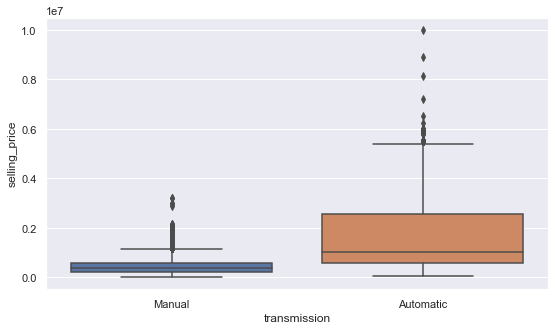

In [27]:
sns.boxplot(data = data,x='transmission', y = 'selling_price')

**Vehicles with Automatic Transmissions seem to fetch a higher selling price**

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

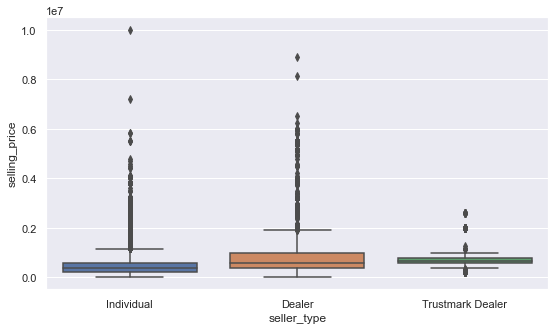

In [28]:
sns.boxplot(data = data,x='seller_type', y = 'selling_price')

**Vehicles sold by individuals seem to have a lower price than those eold through dealers.**

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

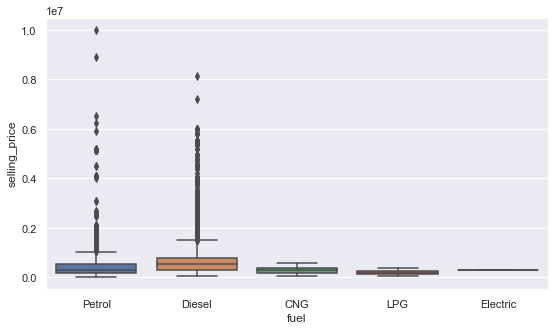

In [29]:
sns.boxplot(data = data,x='fuel', y = 'selling_price')

In [30]:
data.corr(method='spearman', min_periods=1)

,year,selling_price,km_driven,owner
year,1.000000,0.708979,-0.595880,-0.497571
selling_price,0.708979,1.000000,-0.337601,-0.390103
km_driven,-0.595880,-0.337601,1.000000,0.390534
owner,-0.497571,-0.390103,0.390534,1.000000


 Factors like **Number of owners** and **Kilometers a car has been driven** have a detrimental effect on the selling price of a car. 

### Seperating the Dependent and Independent Variables :

In [31]:
data.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0


In [32]:
X = data.drop('selling_price', inplace=False, axis=1)
Y = data[['selling_price']]

In [33]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,1


In [34]:
print(X)

                          name  year  km_driven    fuel seller_type  \
0                Maruti 800 AC  2007      70000  Petrol  Individual   
1     Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual   
2         Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual   
3       Datsun RediGO T Option  2017      46000  Petrol  Individual   
4        Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual   
...                        ...   ...        ...     ...         ...   
8123         Hyundai i20 Magna  2013     110000  Petrol  Individual   
8124     Hyundai Verna CRDi SX  2007     119000  Diesel  Individual   
8125    Maruti Swift Dzire ZDi  2009     120000  Diesel  Individual   
8126           Tata Indigo CR4  2013      25000  Diesel  Individual   
8127           Tata Indigo CR4  2013      25000  Diesel  Individual   

     transmission  owner  
0          Manual      0  
1          Manual      0  
2          Manual      0  
3          Manual      0  
4          M

In [35]:
Y.head()

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000


#### Dependent and Independent variables have been seperated.

### Feature Scaling :

In [36]:
from sklearn.preprocessing import StandardScaler
X[['km_driven']] = StandardScaler().fit_transform(X[['km_driven']])
#Y[['selling_price']] = StandardScaler().fit_transform(Y[['selling_price']])

In [37]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,0.026904,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,-0.348084,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,0.589385,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,-0.423081,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,1.358110,Diesel,Individual,Manual,1


In [38]:
Y.head()

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000


### Encoding Categorical Data :

In [39]:
cat_cols = ['name','year','fuel','seller_type','transmission']
X1 = pd.get_dummies(X, columns = cat_cols)

In [40]:
X1.head()

,km_driven,owner,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Ambassador Grand 2000 DSZ PW CL,name_Ashok Leyland Stile LE,name_Audi A3 35 TDI Premium Plus,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.026904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,-0.348084,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0.589385,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,-0.423081,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,1.358110,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X1, Y, test_size = 0.25, random_state = 0)

### PCA

In [42]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [43]:
pca.fit(Xtrain)
pca.fit(Xtest)

PCA(n_components=0.95)

In [44]:
X_train = pca.transform(Xtrain)
X_test = pca.transform(Xtest)

### Linear Regression :

In [112]:
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [45]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [122]:
lm_pred = lm.predict(X_test)
lm_pred

array([[345177.22818271],
       [635646.60486168],
       [884798.24214011],
       ...,
       [379831.51810807],
       [549763.17409899],
       [734372.51220763]])

In [123]:
lm_pred.shape

(3117, 1)

#### Calculating r2 Score :

In [47]:
lm.score(X_train,y_train)

0.792392587823754

A simple method to calculate Adjusted R-Square :

In [48]:
def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0] #here n is the is number of observations or rows
    p = x.shape[1] #here p is the number of independent variables or columns
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [49]:
adj_r2(X_train,y_train)

0.7763933528570556

Our r2 score is 79.24% and adj r2 is 77.64% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

In [50]:
lm.score(X_test,y_test)

-4373.405395647303

In [51]:
adj_r2(X_test,y_test)

-5569.350311743766

In [125]:
explained_variance_score(y_test, lm_pred)

-4372.826062441847

Text(0, 0.5, 'Predicted Y')

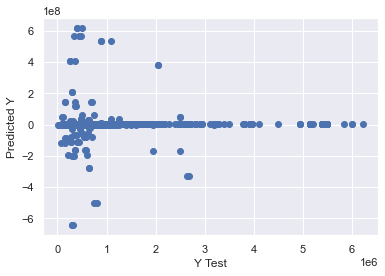

In [126]:
plt.scatter(y_test,lm_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can pretty much see that the model has failed miserably for the data and there is no point going forward with Linear Regression.

### Trying with Lasso Regression :

Lasso Regression will be done with 10 fold Cross Validation to find the ideal value of *alpha*

In [52]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [53]:
alpha = lasscv.alpha_
alpha

15.29672915444279

In [54]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=15.29672915444279)

In [55]:
lasso_reg.score(X_test, y_test)

0.8391811552695798

In [56]:
las_pred = lasso_reg.predict(X_test)
las_pred

array([ 344795.51637065,  637390.11970339, 1013157.80474649, ...,
        367751.8183013 ,  535460.80804026,  741693.96588128])

In [57]:
las_pred.shape

(3117,)

In [58]:
las_pred1 = las_pred.reshape(3117, 1)

In [59]:
las_pred1.shape

(3117, 1)

In [60]:
y_test.shape

(3117, 1)

In [108]:
r2_score(y_test, las_pred1)

0.8391811552695798

In [114]:
explained_variance_score(y_test, las_pred1)

0.8392139208702252

Text(0, 0.5, 'Predicted Y')

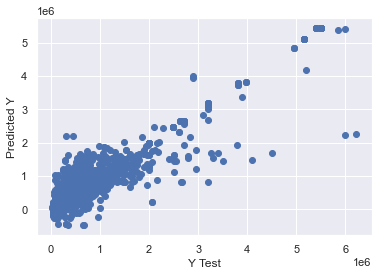

In [127]:
plt.scatter(y_test,las_pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<AxesSubplot:ylabel='Density'>

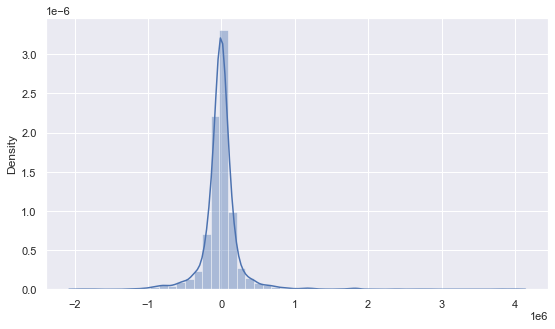

In [62]:
sns.distplot((y_test-las_pred1),bins=50)

### Ridge Regression :

In [63]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([9.40403184, 6.4414972 , 1.54791115, 6.49883297, 1.55941595,
       9.17184319, 7.29713224, 4.12838697, 2.62679487, 3.55067026,
       9.10599642, 0.26280597, 8.32623182, 4.91382213, 0.93508655,
       2.97071195, 4.76790075, 0.51409013, 2.21496177, 9.27518139,
       1.97432853, 6.51725929, 7.43662596, 1.21087013, 3.59920271,
       4.53515841, 1.89275041, 8.37037195, 4.29355356, 5.05204362,
       0.06120935, 9.30627477, 1.67811099, 2.58250674, 1.756698  ,
       5.87309218, 6.3650468 , 6.54863637, 2.23943715, 5.71139322,
       7.61794392, 6.68605711, 9.86890047, 9.41852211, 0.98933006,
       7.83940576, 0.5765841 , 1.20725616, 3.87641372, 3.7269424 ]),
        cv=10, normalize=True)

In [64]:
ridgecv.alpha_

0.0612093535370517

In [65]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.0612093535370517)

In [66]:
ridge_model.score(X_test, y_test)

0.7341903959019906

In [67]:
ridge_pred = ridge_model.predict(X_test)

In [68]:
ridge_pred.shape

(3117, 1)

In [115]:
explained_variance_score(y_test, ridge_pred)

0.7342991177788412

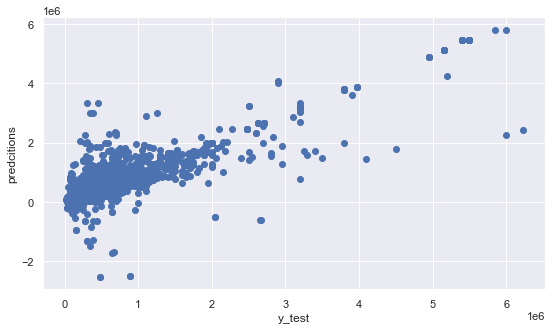

In [70]:
plt.xlabel('y_test')

plt.ylabel('predcitions')
plt.scatter(y_test, ridge_pred)

### Shown above are the distribution of Points in Ridge Regression

Ridge Regression performed poorer than Lasso Regression. I expected this because the data consisted of a lot of colinear features and in my judgement I found it unwise to drop a lot of Data.

<AxesSubplot:ylabel='Density'>

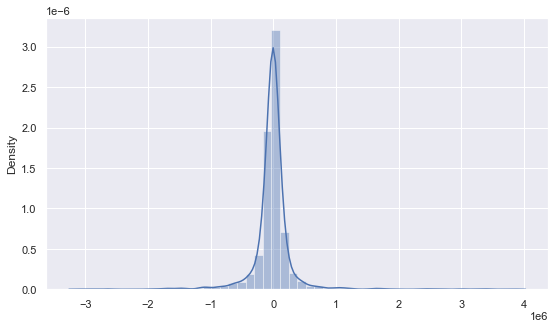

In [72]:
sns.distplot((y_test-ridge_pred),bins=50)

### Distribution of Errors shown in the above plot.

### Random forest Regressor :

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
model = RandomForestRegressor(n_jobs=-1)

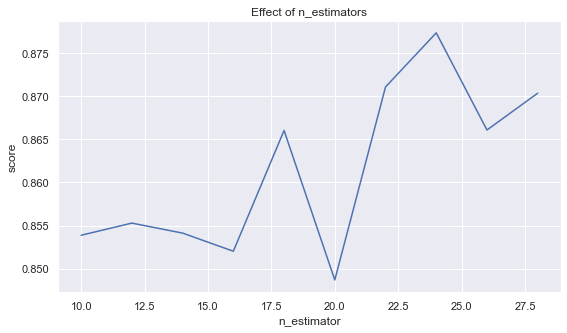

In [84]:
estimators = np.arange(10, 30, 2)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [85]:
regressor = RandomForestRegressor(n_estimators = 24, random_state = 0)

In [86]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=24, random_state=0)

In [87]:
regressor.score(X_test, y_test)

0.8727801668531332

In [88]:
forest_pred = regressor.predict(X_test)

In [89]:
forest_pred.shape

(3117,)

In [90]:
forest_pred1 = forest_pred.reshape(3117, 1)

In [119]:
r2_score(y_test, forest_pred1)

0.8727801668531332

In [118]:
explained_variance_score(y_test, forest_pred1)

0.874486317082079

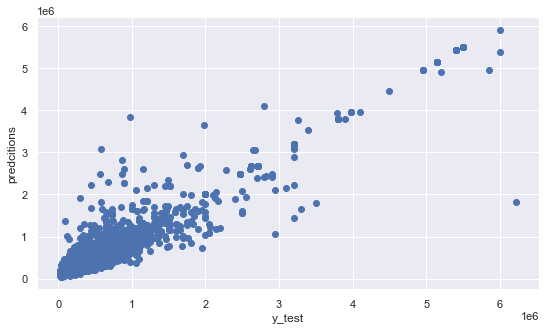

In [91]:
plt.xlabel('y_test')

plt.ylabel('predcitions')
plt.scatter(y_test, forest_pred1)

<AxesSubplot:ylabel='Density'>

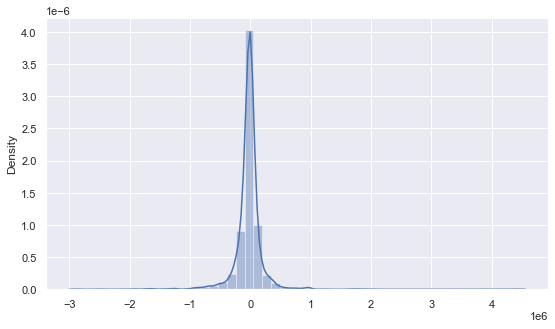

In [92]:
sns.distplot((y_test-forest_pred1),bins=50)

## Conclusions :
1. Linear Regression is not always a Robust model
2. Make and Model of a Vehicle makes a significant impact on the psyche of a customer as is evident from the **Explained Variance Score**
3. It is advisable to try various regression models on any problem.